In [4]:
import muon
import scanpy as sc
from scipy.sparse import csr_matrix

In [2]:
adata_atac = sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/adata_atac_PoissonVI_full.h5ad")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
adata_atac.layers["X_ATAC_reconstruction"][adata_atac.layers["X_ATAC_reconstruction"]<0.1] = 0.0 

In [5]:
adata_atac.layers["X_ATAC_reconstruction"] = csr_matrix(adata_atac.layers["X_ATAC_reconstruction"])

In [6]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation.h5mu")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [8]:
adata_atac = adata_atac[mudata.obs_names]

In [9]:
mudata["atac"].layers["X_ATAC_poissonVI_reconstruction"] = adata_atac.layers["X_ATAC_reconstruction"].copy()

In [10]:
adata_gex = sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/adata_gex_scVI_full.h5ad")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [11]:
adata_gex = adata_gex[mudata.obs_names]

In [13]:
mudata["rna"].layers["X_scVI_reconstruction"] = adata_gex.layers["X_scVI_reconstruction"].copy()

In [14]:
mudata.write("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:1292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


In [1]:
import muon
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [2]:
import scanpy as sc
adata_ann = sc.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/adata_annotation_4.h5ad")
mudata.obs["cell_type_refined"] = adata_ann.obs["cell_type"]

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
mudata.obs[['S_score', 'G2M_score', 'phase', 'proliferation']] =  adata_ann.obs[['S_score', 'G2M_score', 'phase', 'proliferation']]
mudata["rna"].obs[['S_score', 'G2M_score', 'phase', 'proliferation']] =  adata_ann.obs[['S_score', 'G2M_score', 'phase', 'proliferation']]
mudata["atac"].obs[['S_score', 'G2M_score', 'phase', 'proliferation']] =  adata_ann.obs[['S_score', 'G2M_score', 'phase', 'proliferation']]

In [4]:
mudata.obs["cell_type"] = mudata.obs.apply(lambda x: "Eps. progenitors" if x["cell_type"]=="Eps/Delta progenitors" else x["cell_type"], axis=1)
mudata.obs["cell_type_refined"] = mudata.obs.apply(lambda x: "Eps. progenitors" if x["cell_type_refined"]=="Eps/Delta progenitors" else x["cell_type_refined"], axis=1)

In [5]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
      'Ngn3 high cycling': '#adf542',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [6]:
mudata.obs["cell_type"] = mudata.obs["cell_type"].astype("category")
mudata.uns["cell_type_colors"] = [color_dict[ct] for ct in mudata.obs["cell_type"].cat.categories]

mudata.obs["cell_type_refined"] = mudata.obs["cell_type_refined"].astype("category")
mudata.uns["cell_type_refined_colors"] = [color_dict[ct] for ct in mudata.obs["cell_type"].cat.categories]

In [7]:
mudata["rna"].obs["cell_type"] = mudata.obs["cell_type"]
mudata["atac"].obs["cell_type"] = mudata.obs["cell_type"]

mudata["rna"].obs["cell_type_refined"] = mudata.obs["cell_type_refined"]
mudata["atac"].obs["cell_type_refined"] = mudata.obs["cell_type_refined"]

In [8]:
mudata["rna"].obs["cell_type"] = mudata["rna"].obs["cell_type"].astype("category")
mudata["rna"].uns["cell_type_colors"] = [color_dict[ct] for ct in mudata["rna"].obs["cell_type"].cat.categories]

mudata["rna"].obs["cell_type_refined"] = mudata["rna"].obs["cell_type"].astype("category")
mudata["rna"].uns["cell_type_refined_colors"] = [color_dict[ct] for ct in mudata["rna"].obs["cell_type"].cat.categories]

In [9]:
mudata["atac"].obs["cell_type"] = mudata["atac"].obs["cell_type"].astype("category")
mudata["atac"].uns["cell_type_colors"] = [color_dict[ct] for ct in mudata["atac"].obs["cell_type"].cat.categories]

mudata["atac"].obs["cell_type_refined"] = mudata["atac"].obs["cell_type"].astype("category")
mudata["atac"].uns["cell_type_refined_colors"] = [color_dict[ct] for ct in mudata["atac"].obs["cell_type"].cat.categories]

In [10]:
mudata.write("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:1292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c


/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


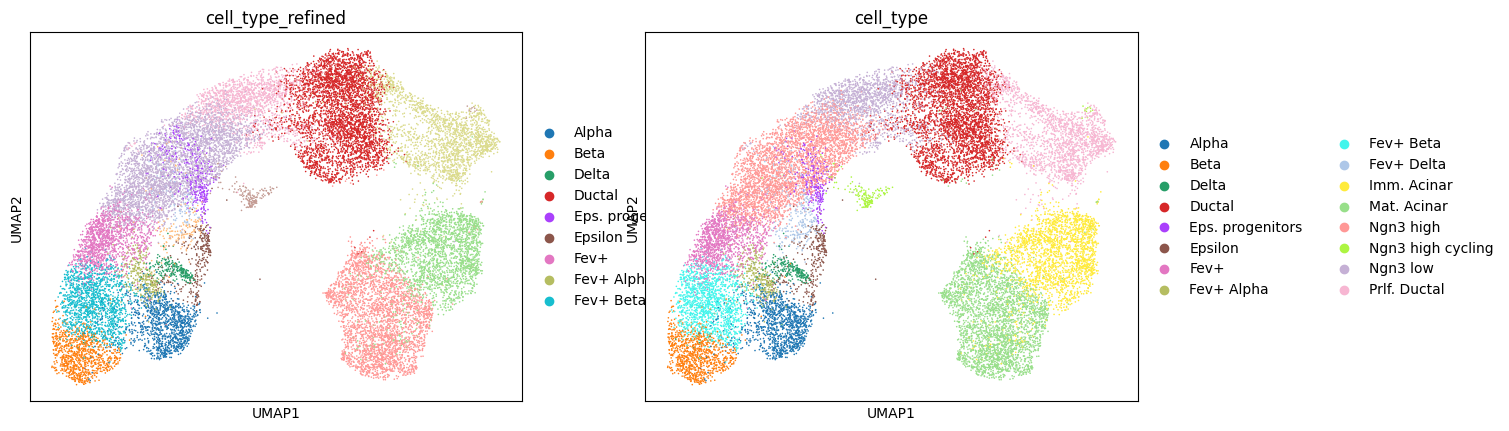

In [11]:
import scanpy as sc
sc.pl.umap(mudata, color=["cell_type_refined", "cell_type"])